# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set units to metric
unit = "metric"

query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | xining
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | tacuarembo
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | acarau
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | tommot
Processing Record 17 of Set 1 | itaituba
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | labytnangi
Processin

Processing Record 37 of Set 4 | bushehr
Processing Record 38 of Set 4 | tolanaro
Processing Record 39 of Set 4 | shache
Processing Record 40 of Set 4 | rudsar
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | visakhapatnam
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | kalmunai
Processing Record 48 of Set 4 | weno
Processing Record 49 of Set 4 | behshahr
Processing Record 0 of Set 5 | clydach
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | ulladulla
Processing Record 4 of Set 5 | tabatinga
Processing Record 5 of Set 5 | jinan-gun
Processing Record 6 of Set 5 | karamay
City not found. Skipping...
Processing Record 7 of Set 5 | puerto ayacucho
Processing Record 8 of Set 5 | sao felix do xingu
Processing Record 9 of Set 5 | cabl

Processing Record 25 of Set 8 | rio grande
Processing Record 26 of Set 8 | sur
Processing Record 27 of Set 8 | north platte
Processing Record 28 of Set 8 | igarka
Processing Record 29 of Set 8 | joaquin v. gonzalez
Processing Record 30 of Set 8 | holualoa
Processing Record 31 of Set 8 | prince rupert
Processing Record 32 of Set 8 | martuk
Processing Record 33 of Set 8 | ola
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | ust'-kulom
Processing Record 36 of Set 8 | posto fiscal rolim de moura
Processing Record 37 of Set 8 | mount pearl
Processing Record 38 of Set 8 | shangri-la
City not found. Skipping...
Processing Record 39 of Set 8 | troitsko-pechorsk
Processing Record 40 of Set 8 | abrego
Processing Record 41 of Set 8 | noosa heads
Processing Record 42 of Set 8 | desvres
Processing Record 43 of Set 8 | tateyama
Processing Record 44 of Set 8 | yaren
Processing Record 45 of Set 8 | luwuk
Processing Record 46 of Set 8 | la maddalena
Processing Record 47 of Set 

Processing Record 14 of Set 12 | keflavik
Processing Record 15 of Set 12 | remire-montjoly
Processing Record 16 of Set 12 | shohimardon
Processing Record 17 of Set 12 | labuan bajo
Processing Record 18 of Set 12 | nabire
Processing Record 19 of Set 12 | muscat
Processing Record 20 of Set 12 | lacombe
Processing Record 21 of Set 12 | khamis mushait
Processing Record 22 of Set 12 | aflou
Processing Record 23 of Set 12 | scottburgh
Processing Record 24 of Set 12 | catumbela
Processing Record 25 of Set 12 | girvan
Processing Record 26 of Set 12 | jabor
Processing Record 27 of Set 12 | brokopondo
Processing Record 28 of Set 12 | sungai penuh
Processing Record 29 of Set 12 | pagar alam
Processing Record 30 of Set 12 | hayma'
City not found. Skipping...
Processing Record 31 of Set 12 | pennagaram
Processing Record 32 of Set 12 | ocean city
Processing Record 33 of Set 12 | zeya
Processing Record 34 of Set 12 | taksimo
Processing Record 35 of Set 12 | la'ie
Processing Record 36 of Set 12 | barr

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [70]:
# Rename columns
city_data_df = city_data_df.rename(columns={"Lat":"Latitude", "Lng":"Longitude", "Max Temp":"Max Temperature"})

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.90,92,100,3.13,NZ,1682140587
1,xining,36.6167,101.7667,8.34,49,100,3.95,CN,1682140587
2,bethel,41.3712,-73.4140,10.81,85,100,3.60,US,1682140588
3,port-aux-francais,-49.3500,70.2167,5.12,74,85,10.92,TF,1682140588
4,tacuarembo,-31.7333,-55.9833,13.84,56,100,2.46,UY,1682140501


In [71]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/cities.csv", index_label="City_ID")

In [72]:
# Read saved data
city_data_df = pd.read_csv("../Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,92,100,3.13,NZ,1682140587
1,xining,36.6167,101.7667,8.34,49,100,3.95,CN,1682140587
2,bethel,41.3712,-73.4140,10.81,85,100,3.60,US,1682140588
3,port-aux-francais,-49.3500,70.2167,5.12,74,85,10.92,TF,1682140588
4,tacuarembo,-31.7333,-55.9833,13.84,56,100,2.46,UY,1682140501


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

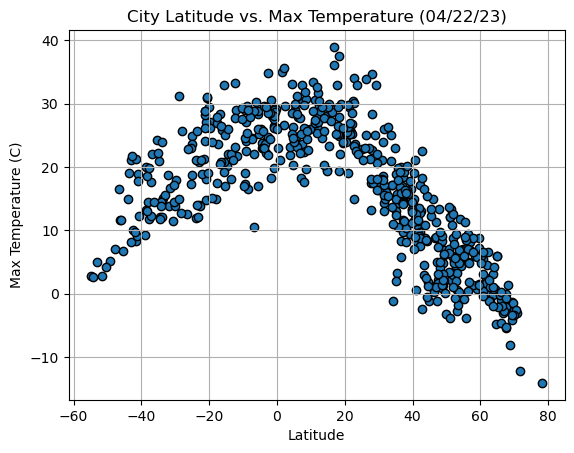

In [73]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"],city_data_df["Max Temperature"],marker="o",edgecolor='black',label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (" + time.strftime("%x") + ")")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

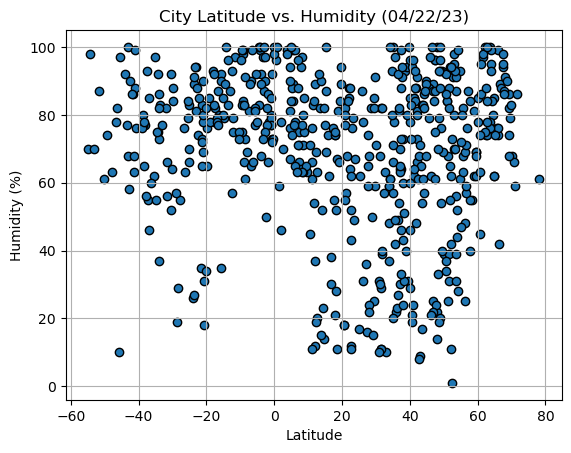

In [74]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"],city_data_df["Humidity"],marker="o",edgecolor='black',label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (" + time.strftime("%x") + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

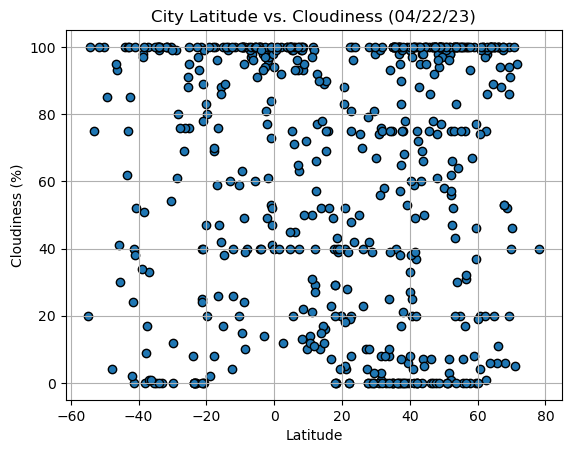

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"],city_data_df["Cloudiness"],marker="o",edgecolor='black',label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (" + time.strftime("%x") + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

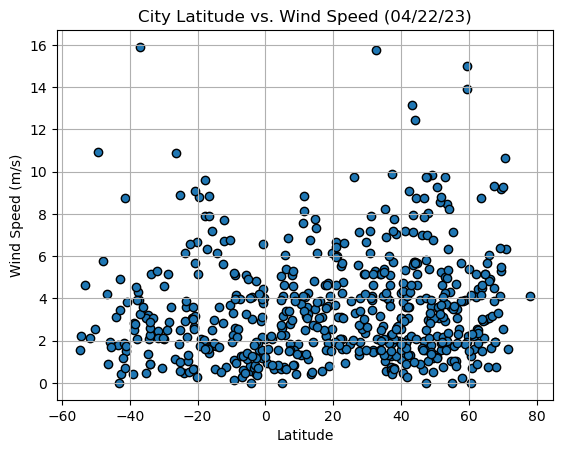

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"],city_data_df["Wind Speed"],marker="o",edgecolor='black',label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (" + time.strftime("%x") + ")")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def plot_lin_regress(df,x_col,y_col,title,line_coord):
    
    x_values = df[x_col].astype("float")
    y_values = df[y_col].astype("float")
    
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coord,fontsize=15,color="red")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{x_col} vs. {y_col} " + title + " (" + time.strftime("%x") + ")")
    
    print(f"The r_value is: {rvalue}")
    
    plt.show()
    

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Latitude']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,xining,36.6167,101.7667,8.34,49,100,3.95,CN,1682140587
2,bethel,41.3712,-73.4140,10.81,85,100,3.60,US,1682140588
5,howrah,22.5892,88.3103,34.00,43,20,2.06,IN,1682140590
9,college,64.8569,-147.8028,5.97,62,100,5.14,US,1682140592
10,ribeira grande,38.5167,-28.7000,16.40,93,78,7.05,PT,1682140592


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Latitude']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,92,100,3.13,NZ,1682140587
3,port-aux-francais,-49.3500,70.2167,5.12,74,85,10.92,TF,1682140588
4,tacuarembo,-31.7333,-55.9833,13.84,56,100,2.46,UY,1682140501
6,acarau,-2.8856,-40.1200,24.24,87,14,4.84,BR,1682140590
7,ushuaia,-54.8000,-68.3000,2.81,70,20,1.54,AR,1682140590


###  Temperature vs. Latitude Linear Regression Plot

The r_value is: -0.8904911073095368


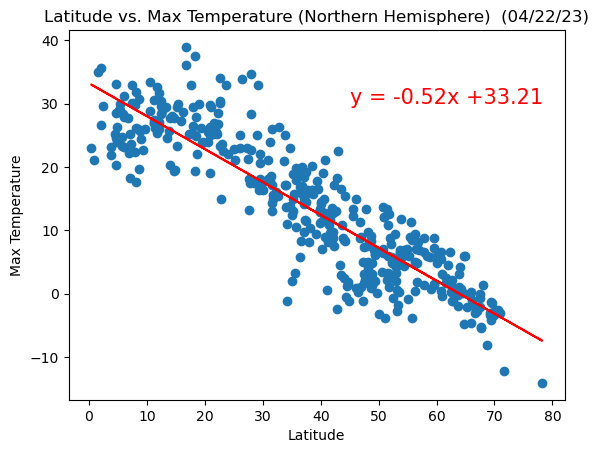

In [80]:
# Linear regression on Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Latitude","Max Temperature","(Northern Hemisphere) ", (45,30))

The r_value is: 0.7218576346384019


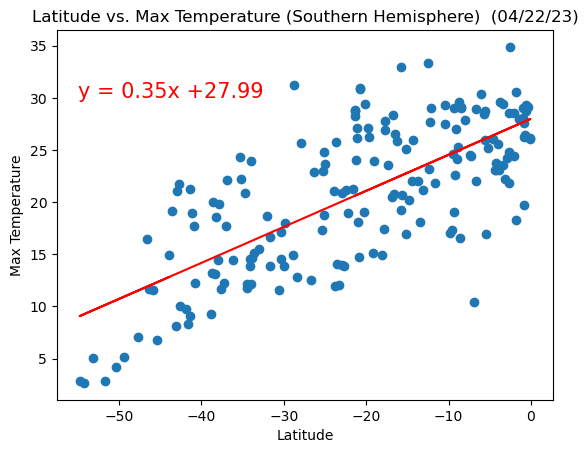

In [81]:
# Linear regression on Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Latitude","Max Temperature","(Southern Hemisphere) ", (-55,30))

**Discussion about the linear relationship:**

There is a strong negative correlation between Latitude and Maximum Temperature in the Northern Hemisphere (r = -0.89), which is opposed by an inverse relationship between Latitude and Maximum Temperature in the Southern Hemisphere which shows a strong positive correlation (r = 0.72), though not as strong as the correlation in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r_value is: 0.09521788505361617


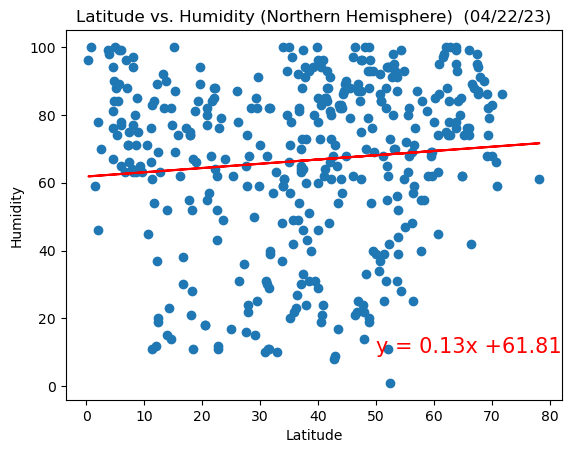

In [82]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Latitude","Humidity","(Northern Hemisphere) ", (50,10))

The r_value is: 0.21692851869275512


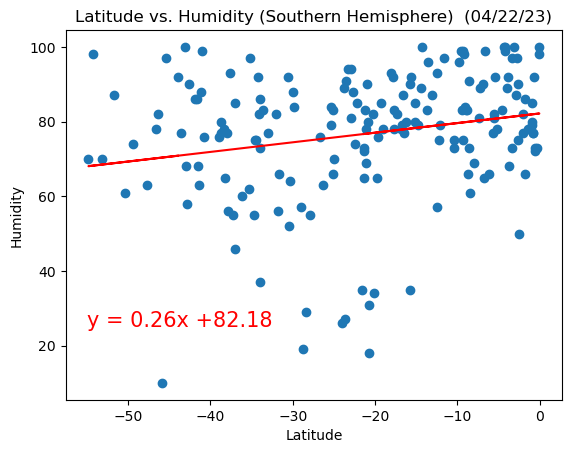

In [83]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Latitude","Humidity","(Southern Hemisphere) ", (-55,25))

**Discussion about the linear relationship:**

There appears to be no strong correlation in either hemisphere regarding Latitude and Humidity. There is nearly no correlation in the Northern Hemisphere (r = 0.10) and the Southern Hemisphere (r = 0.22).

### Cloudiness vs. Latitude Linear Regression Plot

The r_value is: 0.10201174956395725


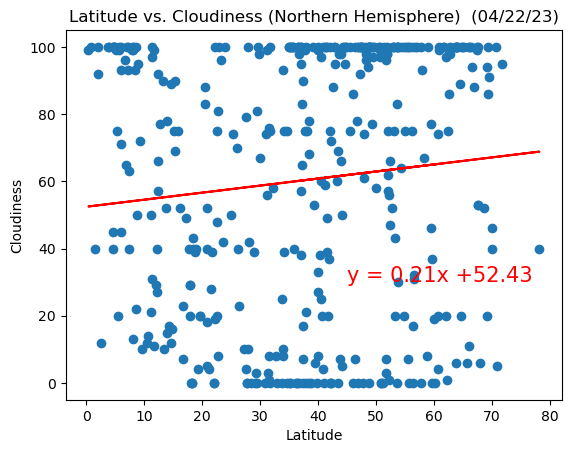

In [84]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Latitude","Cloudiness","(Northern Hemisphere) ", (45,30))

The r_value is: 0.15537721641294477


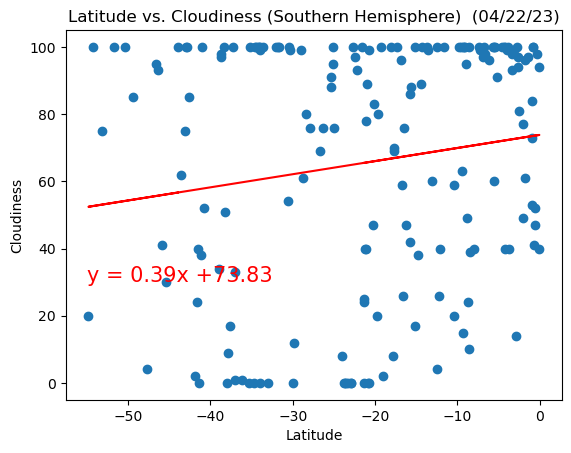

In [85]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Latitude","Cloudiness","(Southern Hemisphere) ", (-55,30))

**Discussion about the linear relationship:**

There appears to be no strong correlation in either hemisphere regarding Latitude and Cloudiness. There is nearly no correlation in the Northern Hemisphere (r = 0.10) and a weak positive correlation in the Southern Hemisphere (r = 0.16).

### Wind Speed vs. Latitude Linear Regression Plot

The r_value is: 0.11995703455214166


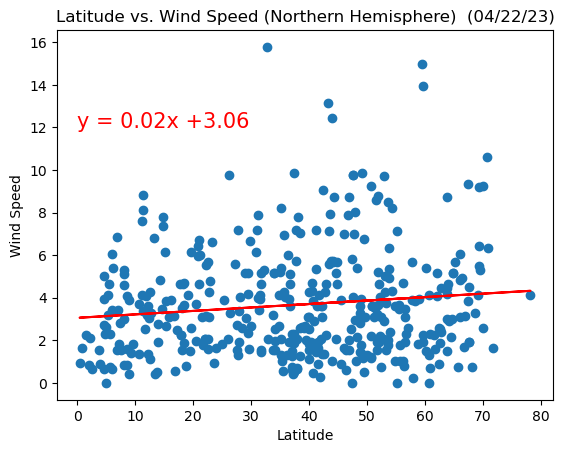

In [86]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Latitude","Wind Speed","(Northern Hemisphere) ", (0,12))

The r_value is: -0.08632592468463816


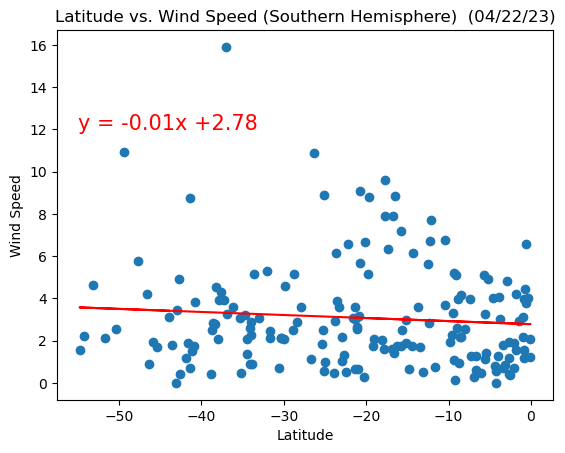

In [87]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Latitude","Wind Speed","(Southern Hemisphere) ", (-55,12))

**Discussion about the linear relationship:**

There appears to be no strong correlation in either hemisphere regarding Latitude and Humidity. There is nearly no correlation in the Northern Hemisphere (r = 0.12) as well as the Southern Hemisphere (r = -0.09).